In [2]:
import pandas as pd
import numpy as np

In [3]:
df_twitter = pd.read_json('./10K_verified.json')
df_twitter


date                                               text  fluct
65906   2021-04-07  Bitcoin price crash: Cryptocurrency plunges in...      0
66378   2021-04-07  The #BTC is stuck inside a large range between...      0
66447   2021-04-07  Price data of #Bitcoin #BTC pairs on #btcturkp...      0
67137   2021-04-07  #WhatsApp rival #Signal reportedly testing pee...      0
67248   2021-04-07  When supply is more than demand, what happens?...      0
...            ...                                                ...    ...
1884552 2021-11-25  In this video I'll show you some of my huge #B...      1
1884928 2021-11-25           up only #Bitcoin https://t.co/HxCx1l71Pe      1
1885069 2021-11-25  With Web3, I think we will see many more anony...      1
1885235 2021-11-25  #Bitcoin once again is a risk asset and no hav...      1
1885301 2021-11-25  Will #Solana overtake #Ethereum in market cap?...      1

[10783 rows x 3 columns]

In [6]:
df_twitter.columns
df_twitter.dropna(inplace=True)

Open tabular data

In [7]:
df_price = pd.read_csv("./BTCPRICE.csv")
df_price.head()

Date          Open          High           Low         Close  \
0  2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
1  2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2  2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
3  2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063   
4  2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

      Adj Close       Volume  
0  29374.152344  40730301359  
1  32127.267578  67865420765  
2  32782.023438  78665235202  
3  31971.914063  81163475344  
4  33992.429688  67547324782

In [9]:
df_filter = df_price[['Date', 'High']]
df_filter.head()

Date          High
0  2021-01-01  29600.626953
1  2021-01-02  33155.117188
2  2021-01-03  34608.558594
3  2021-01-04  33440.218750
4  2021-01-05  34437.589844

In [10]:
is_high = [None]
is_high

for you in range(1,len(df_filter['High'])):
    prev = df_filter['High'][you-1]
    now = df_filter['High'][you]
    
    if prev < now:
        is_high.append(1)
    else:
        is_high.append(0)

df_filter['fluct'] = is_high
df_filter.drop([0], axis = 0, inplace=True)

df_filter

C:\Users\Rohan\AppData\Local\Temp/ipykernel_15704/3397183647.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['fluct'] = is_high
C:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Date          High  fluct
1    2021-01-02  33155.117188    1.0
2    2021-01-03  34608.558594    1.0
3    2021-01-04  33440.218750    0.0
4    2021-01-05  34437.589844    1.0
5    2021-01-06  36879.699219    1.0
..          ...           ...    ...
339  2021-12-06  50929.519531    1.0
340  2021-12-07  51934.781250    1.0
341  2021-12-08  51171.375000    0.0
342  2021-12-09  50797.164063    0.0
343  2021-12-10  49899.292969    0.0

[343 rows x 3 columns]

Link twitter tweets with bitcoin increase

In [19]:
# function to 
# def checkincrease(date):
#     for i in range(len(df_filter)):
#         if date == df_filter['Date'].iloc[i]:
#             return df_filter['fluct'].iloc[i]
#     return None



df_twitter['fluct'] = [None for x in range(len(df_twitter))]
df_twitter['open'] = [None for x in range(len(df_twitter))]
df_twitter['low'] = [None for x in range(len(df_twitter))]
df_twitter['high'] = [None for x in range(len(df_twitter))]
df_twitter['close'] = [None for x in range(len(df_twitter))]

# df_twitter['fluct'] = df_twitter['fluct'].apply(checkincrease)
for index, row in df_twitter.iterrows():
    dt = row['date']
    for index2, row2 in df_filter.iterrows():
        if row2['Date'] == dt:
            df_twitter.at[index,'fluct'] = row2['fluct']
            break
    for index2, row2 in df_price.iterrows():
        if row2['Date'] == dt:
            df_twitter.at[index,'open'] = row2['Open']
            df_twitter.at[index,'low'] = row2['Low']
            df_twitter.at[index,'high'] = row2['High']
            df_twitter.at[index,'close'] = row2['Close']
            break
                
df_twitter.head()    
df_twitter['fluct'].value_counts()



KeyboardInterrupt: 

In [ ]:
# plot the flunctuations during the tweets

In [11]:
df_twitter

date                                               text  fluct
65906   2021-04-07  Bitcoin price crash: Cryptocurrency plunges in...      0
66378   2021-04-07  The #BTC is stuck inside a large range between...      0
66447   2021-04-07  Price data of #Bitcoin #BTC pairs on #btcturkp...      0
67137   2021-04-07  #WhatsApp rival #Signal reportedly testing pee...      0
67248   2021-04-07  When supply is more than demand, what happens?...      0
...            ...                                                ...    ...
1884552 2021-11-25  In this video I'll show you some of my huge #B...      1
1884928 2021-11-25           up only #Bitcoin https://t.co/HxCx1l71Pe      1
1885069 2021-11-25  With Web3, I think we will see many more anony...      1
1885235 2021-11-25  #Bitcoin once again is a risk asset and no hav...      1
1885301 2021-11-25  Will #Solana overtake #Ethereum in market cap?...      1

[10783 rows x 3 columns]

In [12]:
df_twitter['fluct'].value_counts().plot(kind='bar')
df_twitter['fluct'].value_counts()

1    5513
0    5270
Name: fluct, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_twitter['text'], df_twitter['fluct'], random_state=50)

In [14]:
X_train

293778     #Bitcoin Market Update: \n\nBTC is moving bull...
356647     Got a text?? 📱\n\nThe NHS will be sending you ...
440620     Tesla will 'most likely' restart accepting bit...
297672              #Bitcoin is hope https://t.co/gq5dIx9e31
302854     ARK’s Bitcoin ETF is Cathie Wood’s latest fora...
                                 ...                        
1228323    Isn't that the same that #bitcoin maxis are sa...
1738812    Here’s why #bitcoin is the best inflation hedg...
874775                             #Bitcoin pumpin' to $48K!
1728126    #GlobalMarkets | From Wall Street to #Bitcoin,...
735747     Great podcast episode from @Upticken of "The G...
Name: text, Length: 8087, dtype: object

In [15]:
y_train

293778     1
356647     0
440620     0
297672     1
302854     1
          ..
1228323    0
1738812    0
874775     1
1728126    0
735747     1
Name: fluct, Length: 8087, dtype: int64

In [16]:
X_train[0]

KeyError: 0

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)

In [18]:
print(len(vect.get_feature_names_out()))

8688


In [19]:
X_train_vectorized = vect.transform(X_train)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 50, max_iter=10000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=50)

In [21]:
predictions = model.predict(vect.transform(X_test))

In [22]:
print(predictions)

[0 0 0 ... 1 0 0]


In [23]:
print(y_test)

867139     1
356797     0
356723     0
1257342    1
1213772    0
          ..
1235187    1
1654673    0
1168662    0
510763     0
246202     0
Name: fluct, Length: 2696, dtype: int64


In [24]:
from sklearn.metrics import roc_auc_score
print("AUC score is", roc_auc_score(y_test, predictions))

AUC score is 0.6120035265594004


In [25]:
#analyze the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1300
           1       0.62      0.63      0.63      1396

    accuracy                           0.61      2696
   macro avg       0.61      0.61      0.61      2696
weighted avg       0.61      0.61      0.61      2696



In [26]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()

In [27]:
print("Negative words", feature_names[sorted_coef_index[:10]])

Negative words ['taproot' 'banks are' 'day to' 'flow' 'winter' 'for cryptocurrency'
 'blockstream' '000 000' 'yes bitcoin' 'in recent']


In [28]:
print("Positive words", feature_names[sorted_coef_index[:-11:-1]])

Positive words ['bwordevent' 'bde' 'olympicgames' 'digital currency' 'photo'
 'openingceremony' 'hype' 'the recent' 'not bitcoin' '000 mark']


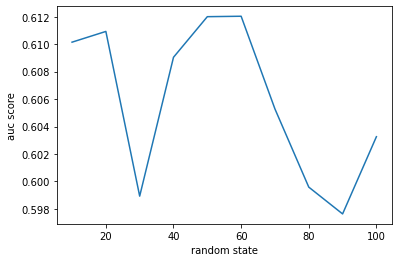

In [29]:
#plot correlation between random state and auc
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

random_state = [10,20,30,40,50,60,70,80,90,100]
auc = []

for i in random_state:
    X_train, X_test, y_train, y_test = train_test_split(df_twitter['text'], df_twitter['fluct'], random_state=i)
    vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    model = LogisticRegression(random_state = i, max_iter=10000, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train_vectorized, y_train)
    predictions = model.predict(vect.transform(X_test))
    auc.append(metrics.roc_auc_score(y_test, predictions))

plt.plot(random_state, auc)
plt.xlabel('random state')
plt.ylabel('auc score')
plt.show()